In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_breast_cancer = datasets.load_breast_cancer()
data_breast_cancer = pd.DataFrame(
    {
        'area': data_breast_cancer["data"][:, (3)],
        'smoothness': data_breast_cancer["data"][:, (4)],
        'target': data_breast_cancer["target"]
    }
    ,columns=['area','smoothness','target'])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
cancer_X_training, cancer_X_test, cancer_y_training, cancer_y_test = train_test_split(data_breast_cancer[['area','smoothness']],data_breast_cancer[['target']],test_size=0.2)

In [5]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

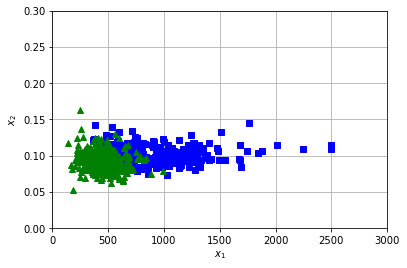

In [6]:
X = data_breast_cancer[['area','smoothness']]
y = (data_breast_cancer[['target']]).astype(np.int8)
plot_dataset(X.to_numpy(),y.to_numpy().flatten(),[0, 3000, 0, 0.3])

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import pickle

In [8]:
svm_clf_w = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf_w.fit(cancer_X_training, cancer_y_training.to_numpy().flatten())

w_pred_train = svm_clf_w.predict(cancer_X_training)
w_pred_test = svm_clf_w.predict(cancer_X_test)
acc_cancer_train = accuracy_score(cancer_y_training,w_pred_train)
acc_cancer_test = accuracy_score(cancer_y_test,w_pred_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
    ])
svm_clf.fit(cancer_X_training, cancer_y_training.to_numpy().flatten())

w_pred_train = svm_clf.predict(cancer_X_training)
w_pred_test = svm_clf.predict(cancer_X_test)

acc_scal_cancer_train = accuracy_score(cancer_y_training,w_pred_train)
acc_scal_cancer_test = accuracy_score(cancer_y_test,w_pred_test)

In [10]:
# Saving
ll = list()
ll.append(acc_cancer_train)
ll.append(acc_cancer_test)
ll.append(acc_scal_cancer_train)
ll.append(acc_scal_cancer_test)

with open('bc_acc.pkl', 'wb') as handle:
    pickle.dump(ll, handle)

In [11]:
data_iris = datasets.load_iris()
data_iris = pd.DataFrame(
    {
        'length': data_iris["data"][:, (2)],
        'width': data_iris["data"][:, (3)],
        'target': ((data_iris["target"] == 2).astype(np.int8))
    }
    ,columns=['length','width','target'])
data_iris

,length,width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [12]:
iris_X_training, iris_X_test, iris_y_training, iris_y_test = train_test_split(data_iris[['length','width']],data_iris[['target']],test_size=0.2)

In [13]:
svm_clf_iris_w = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf_iris_w.fit(iris_X_training, iris_y_training.to_numpy().flatten())

iris_w_pred_train = svm_clf_iris_w.predict(iris_X_training)
iris_w_pred_test = svm_clf_iris_w.predict(iris_X_test)

acc_iris_train = accuracy_score(iris_y_training,iris_w_pred_train)
acc_iris_test = accuracy_score(iris_y_test,iris_w_pred_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
svm_clf_iris = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
    ])
svm_clf_iris.fit(iris_X_training, iris_y_training.to_numpy().flatten().astype(np.int8))

iris_w_pred_training = svm_clf_iris.predict(iris_X_training)
iris_w_pred_test = svm_clf_iris.predict(iris_X_test)

acc_scal_iris_train = accuracy_score(iris_y_training, iris_w_pred_training)
acc_scal_iris_test = accuracy_score(iris_y_test, iris_w_pred_test)

In [15]:
# Saving
ll = list()
ll.append(acc_iris_train)
ll.append(acc_iris_test)
ll.append(acc_scal_iris_train)
ll.append(acc_scal_iris_test)

with open('iris_acc.pkl', 'wb') as handle:
    pickle.dump(ll, handle)